# Categorical data

## Hypothesis testing

### $\chi^²$ test of independency
#### *is variation in categorical data due to chance or one of the variables?*

<img src="../img/chi2.png" width="200">
- Es wird eine Hypothese aufgestellt (Bsp.: Gewürfeltes Ergebnis kommt nicht von Unregelmäßigkeiten).
- Der Wertebereich wird in $k$ Klassen
- Wir testen wieviele Werte in den jeweiligen Klassen liegen ($O_i$)
- Wir berechnen erwarteten Beobachtungen in den Klassen ($E_i$)
- Wir berechnen den Test (T) und vergleichen mit dem theoretischen Wert ($\chi^2_t$) <font color="red">unter einem Signifikanzniveau $\alpha$</font>
- Falls T > $\chi^2_t$ muss Hypothese unter Signifikanzniveau alpha verworfen werden

Significance level $\alpha$: I am 1-$\alpha$ sure that I'm accepting or not accepting a hypothesis.

Significance does not imply importance

#### Take away:

$\Rightarrow$ The $\chi^2$ test lets us find out if a null hypothesis is true.

$\Rightarrow$ Watson uses $\chi^2$ test to tell whether a feature is a predictor of the target variable.

#### *Example* [i](http://www.r-tutor.com/elementary-statistics/goodness-fit/chi-squared-test-independence):

In [103]:
library(MASS)
library(ggplot2)
library(reshape2)
options(repr.plot.width=4, repr.plot.height=3)

tbl = table(survey$Smoke, survey$Exer); tbl

       
        Freq None Some
  Heavy    7    1    3
  Never   87   18   84
  Occas   12    3    4
  Regul    9    1    7

Hypothesis: Students smoking habit is independent of their exercise level at 0.05 significance level

In [52]:
my.chi$residuals #my.chi$observed; my.chi$expected

       
               Freq        None        Some
  Heavy  0.70828770 -0.06957171 -0.73356118
  Never -0.53116543 -0.09774271  0.62274614
  Occas  0.90099537  0.84386422 -1.38483121
  Regul  0.24880398 -0.51025506 -0.02232721

In [101]:
ResidualPlotFunction <- function(dt){
    options(warn=-1)
my.chi <- chisq.test(dt) #perform chisq test
df.chi <- as.data.frame.matrix(my.chi$residuals) #transform to df
df.chi["res"]  <- rownames(df.chi) #index
df.chi <- melt( df.chi, id.vars="res", value.name="residuals", variable.name="als") #transform to LONG format
p <- ggplot(df.chi, aes(x= als, y= res), fill = residuals) + theme(axis.title.x = element_blank(),axis.title.y = element_blank())+ geom_tile(aes(fill = residuals), colour = "white") + scale_fill_gradient2(low="steelblue", high="green", mid="white") +geom_text(aes(label=round(residuals,digits=2)), size=3) #scale_fill_gradient(low="steelblue", high="green") #geom_bar( position = "identity", stat = "identity", alpha = .3 )# + geom_tile(aes(fill = 'rescale'), colour = 'white') + scale_fill_gradient(low = 'white', high = 'steelblue')
    options(warn=0)
return(p)
}

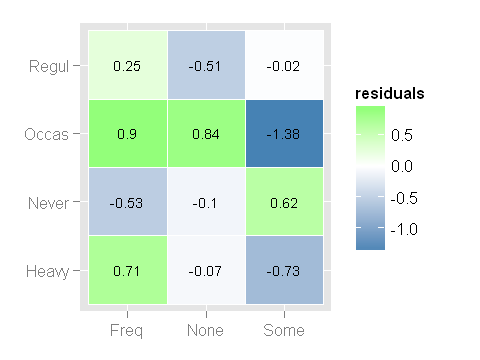

In [102]:
ResidualPlotFunction(tbl)

# Books
- Statistik - *Hartung*
- Statistik - *Fahrmeir, Künstler, Pigeot, Tutz*